NAMA : MUHAMMAD NAFISH ZALDINANDA

Program : Baparekraf Digital Talent 2023 | Level Mahir Machine Learning Terapan

Proyek Akhir - Sistem Rekomendasi

"Rekomendasi Destinasi Wisata Kota Jakarta"

Dataset yang dipakai sebagai berikut : https://drive.google.com/drive/u/0/folders/17-yW3Q3FEZst3lNX3eUAudObtidWQWFf

# **Import** **Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


#**Load Data**

In [3]:
destination = pd.read_csv(r'/content/drive/My Drive/dataset/Indonesia Tourism Destination/tourism_with_id.csv')
destination_rating = pd.read_csv(r'/content/drive/My Drive/dataset/Indonesia Tourism Destination/tourism_rating.csv')
user = pd.read_csv(r'/content/drive/My Drive/dataset/Indonesia Tourism Destination/user.csv')

#**Data Understanding**

***Dataset destination***

In [4]:
print('Jumlah Sample      :', len(destination.iloc[:,1]))
print('Jumlah Fitur       :', len(destination.iloc[1,:]))
print(f'Terdapat {len(destination.iloc[1,:])} Kolom Fitur pada Dataset yaitu:')
print('Fitur Data        :', destination.columns.tolist()[:])
pd.options.display.max_columns = None
destination.head()

Jumlah Sample      : 437
Jumlah Fitur       : 13
Terdapat 13 Kolom Fitur pada Dataset yaitu:
Fitur Data        : ['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price', 'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12']


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


Mengetahui Kota Destinasi Wisata pada Dataset

In [5]:
print(f"Terdapat {destination['City'].nunique()} Kota Destinasi Wisata")
print('Kota Destinasi   :', destination['City'].unique())

Terdapat 5 Kota Destinasi Wisata
Kota Destinasi   : ['Jakarta' 'Yogyakarta' 'Bandung' 'Semarang' 'Surabaya']


Pemilihan Dataset (destination) Hanya pada Destinasi Wisata di Kota Jakarta

In [6]:
destination = destination[destination['City']=='Jakarta']
destination

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,80,Plaza Indonesia,Plaza Indonesia diresmikan pada awal tahun 199...,Pusat Perbelanjaan,Jakarta,0,4.7,120.0,"{'lat': -6.193925900000002, 'lng': 106.8222158}",-6.193926,106.822216,NaN,80
80,81,Mall Thamrin City,Thamrin City atau Thamrin City Mall merupakan ...,Pusat Perbelanjaan,Jakarta,0,4.4,60.0,"{'lat': -6.1946096, 'lng': 106.817905}",-6.194610,106.817905,NaN,81
81,82,Museum Satria Mandala,Museum Satria Mandala adalah museum sejarah pe...,Budaya,Jakarta,5000,4.5,150.0,"{'lat': -6.231698499999999, 'lng': 106.8185425}",-6.231699,106.818543,NaN,82
82,83,Alive Museum Ancol,Museum kini tidak hanya menawarkan benda – ben...,Taman Hiburan,Jakarta,200000,4.3,NaN,"{'lat': -6.117534399999999, 'lng': 106.857313}",-6.117534,106.857313,NaN,83


Menghapus Kolom yang Tidak Ada Nilainya

In [7]:
destination = destination.drop(destination.columns[[11, 12]], axis=1)
destination

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134
...,...,...,...,...,...,...,...,...,...,...,...
79,80,Plaza Indonesia,Plaza Indonesia diresmikan pada awal tahun 199...,Pusat Perbelanjaan,Jakarta,0,4.7,120.0,"{'lat': -6.193925900000002, 'lng': 106.8222158}",-6.193926,106.822216
80,81,Mall Thamrin City,Thamrin City atau Thamrin City Mall merupakan ...,Pusat Perbelanjaan,Jakarta,0,4.4,60.0,"{'lat': -6.1946096, 'lng': 106.817905}",-6.194610,106.817905
81,82,Museum Satria Mandala,Museum Satria Mandala adalah museum sejarah pe...,Budaya,Jakarta,5000,4.5,150.0,"{'lat': -6.231698499999999, 'lng': 106.8185425}",-6.231699,106.818543
82,83,Alive Museum Ancol,Museum kini tidak hanya menawarkan benda – ben...,Taman Hiburan,Jakarta,200000,4.3,NaN,"{'lat': -6.117534399999999, 'lng': 106.857313}",-6.117534,106.857313


Mengetahui Jumlah Sample dan Fitur Pada Dataset Setelah Menghapus Kolom

In [8]:
print('Jumlah Sample      :', len(destination.iloc[:,1]))
print('Jumlah Fitur       :', len(destination.iloc[1,:]))
print(f'Terdapat {len(destination.iloc[1,:])} Kolom Fitur pada Dataset yaitu:')
pd.options.display.max_columns = None
destination.head()

Jumlah Sample      : 84
Jumlah Fitur       : 11
Terdapat 11 Kolom Fitur pada Dataset yaitu:


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


Informasi Dataset destination

In [9]:
destination.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      84 non-null     int64  
 1   Place_Name    84 non-null     object 
 2   Description   84 non-null     object 
 3   Category      84 non-null     object 
 4   City          84 non-null     object 
 5   Price         84 non-null     int64  
 6   Rating        84 non-null     float64
 7   Time_Minutes  37 non-null     float64
 8   Coordinate    84 non-null     object 
 9   Lat           84 non-null     float64
 10  Long          84 non-null     float64
dtypes: float64(4), int64(2), object(5)
memory usage: 7.9+ KB


Menghapus Kolom Fitur yang Tidak Digunakan pada Proyek Ini Yaitu Time_Minutes Karena pada Fitur Ini Terdapat Banyak *missing value*



In [10]:
destination = destination.drop(destination.columns[[7]], axis=1)
destination

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134
...,...,...,...,...,...,...,...,...,...,...
79,80,Plaza Indonesia,Plaza Indonesia diresmikan pada awal tahun 199...,Pusat Perbelanjaan,Jakarta,0,4.7,"{'lat': -6.193925900000002, 'lng': 106.8222158}",-6.193926,106.822216
80,81,Mall Thamrin City,Thamrin City atau Thamrin City Mall merupakan ...,Pusat Perbelanjaan,Jakarta,0,4.4,"{'lat': -6.1946096, 'lng': 106.817905}",-6.194610,106.817905
81,82,Museum Satria Mandala,Museum Satria Mandala adalah museum sejarah pe...,Budaya,Jakarta,5000,4.5,"{'lat': -6.231698499999999, 'lng': 106.8185425}",-6.231699,106.818543
82,83,Alive Museum Ancol,Museum kini tidak hanya menawarkan benda – ben...,Taman Hiburan,Jakarta,200000,4.3,"{'lat': -6.117534399999999, 'lng': 106.857313}",-6.117534,106.857313


***Dataset destination_rating***

In [11]:
destination_rating

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


Dataset destination_rating berisi *rating* tempat wisata yang diperoleh dari *user*

Pemilihan dataset destination_rating sehingga berisi *rating* destinasi wisata untuk kota Jakarta saja

In [12]:
destination_rating = pd.merge(destination_rating, destination[['Place_Id']], how='right', on='Place_Id')
destination_rating

,User_Id,Place_Id,Place_Ratings
0,36,1,4
1,38,1,2
2,64,1,2
3,74,1,2
4,86,1,4
...,...,...,...
1915,211,84,4
1916,219,84,5
1917,256,84,1
1918,290,84,2


Mengetahui Dimensi dataset destination_rating

In [13]:
destination_rating.shape

(1920, 3)

Terdapat 1920 sample ulasan berupa nilai *rating* dan berisi 3 fitur

Informasi dataset destination_rating

In [14]:
destination_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 0 to 1919
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        1920 non-null   int64
 1   Place_Id       1920 non-null   int64
 2   Place_Ratings  1920 non-null   int64
dtypes: int64(3)
memory usage: 60.0 KB


Tidak terdapat *missing value*

***Dataset user***

In [15]:
user

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20
...,...,...,...
295,296,"Lampung, Sumatera Selatan",31
296,297,"Palembang, Sumatera Selatan",39
297,298,"Bogor, Jawa Barat",38
298,299,"Sragen, Jawa Tengah",27


Pemilihan Dataset (*user*) Hanya *User* yang Memberikan Ulasan Destinasi Wisata Kota Jakarta Saja

In [16]:
user = pd.merge(user, destination_rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user

,User_Id,Location,Age
83,1,"Semarang, Jawa Tengah",20
18,2,"Bekasi, Jawa Barat",21
345,3,"Cirebon, Jawa Barat",23
62,4,"Bekasi, Jawa Barat",21
63,5,"Lampung, Sumatera Selatan",20
...,...,...,...
130,296,"Lampung, Sumatera Selatan",31
153,297,"Palembang, Sumatera Selatan",39
323,298,"Bogor, Jawa Barat",38
182,299,"Sragen, Jawa Tengah",27


Mengetahui Dimensi dataset user

In [17]:
user.shape

(300, 3)

Data ini memiliki 300 sample dan 3 fitur.

Informasi Dataset *user*

In [18]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 83 to 183
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 9.4+ KB


#***Exploratory Data Analysis*** **(EDA)**

#***Univariate Exploratory Data Analysis*** **(UEDA)**

***Dataset destination***

In [19]:
destination.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Place_Id,Price,Rating,Lat,Long
count,84.00,84.00,84.00,84.00,84.00
mean,42.50,45130.95,4.49,-6.09,106.78
std,24.39,115657.34,0.20,0.80,0.32
min,1.00,0.00,4.00,-6.38,103.93
25%,21.75,0.00,4.40,-6.21,106.81
50%,42.50,4500.00,4.50,-6.18,106.82
75%,63.25,25000.00,4.60,-6.13,106.84
max,84.00,900000.00,5.00,1.08,106.96


Pada dataset destination, fitur Price menunjukkan harga tiket masuk dengan rentang harga Rp. 0 sampai Rp. 900.000 dan fitur Rating menunjukkan rating dari destinasi wisata dengan rating terendah untuk destinasi kota Jakarta adalah 4.0 dan tertinggi 5.0

Distribusi Rata-Rata Rating Destinasi

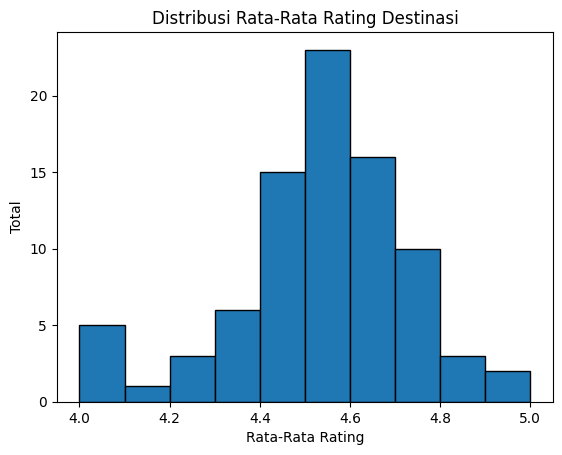

In [20]:
plt.hist(destination.Rating, edgecolor='black')
plt.ylabel('Total')
plt.xlabel('Rata-Rata Rating')
plt.title("Distribusi Rata-Rata Rating Destinasi")
plt.show()

Kategori Destinasi Wisata di Kota Jakarta

In [21]:
print(f"Terdapat {destination['Place_Name'].nunique()} Tempat Wisata di DKI Jakarta")
print(f"Terdiri dari {destination['Category'].nunique()} Kategori Wisata yaitu")
print('Kategori Wisata  :', destination['Category'].unique())

Terdapat 84 Tempat Wisata di DKI Jakarta
Terdiri dari 6 Kategori Wisata yaitu
Kategori Wisata  : ['Budaya' 'Taman Hiburan' 'Cagar Alam' 'Bahari' 'Pusat Perbelanjaan'
 'Tempat Ibadah']


Persebaran Jumlah Tempat Wisata Berdasarkan Kategori

<ipython-input-22-26d557d28ace>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label, count in destination['Category'].value_counts().iteritems():


Jumlah Tempat Wisata dengan Kategori Budaya : 32
Jumlah Tempat Wisata dengan Kategori Taman Hiburan : 27
Jumlah Tempat Wisata dengan Kategori Pusat Perbelanjaan : 10
Jumlah Tempat Wisata dengan Kategori Bahari : 8
Jumlah Tempat Wisata dengan Kategori Cagar Alam : 4
Jumlah Tempat Wisata dengan Kategori Tempat Ibadah : 3


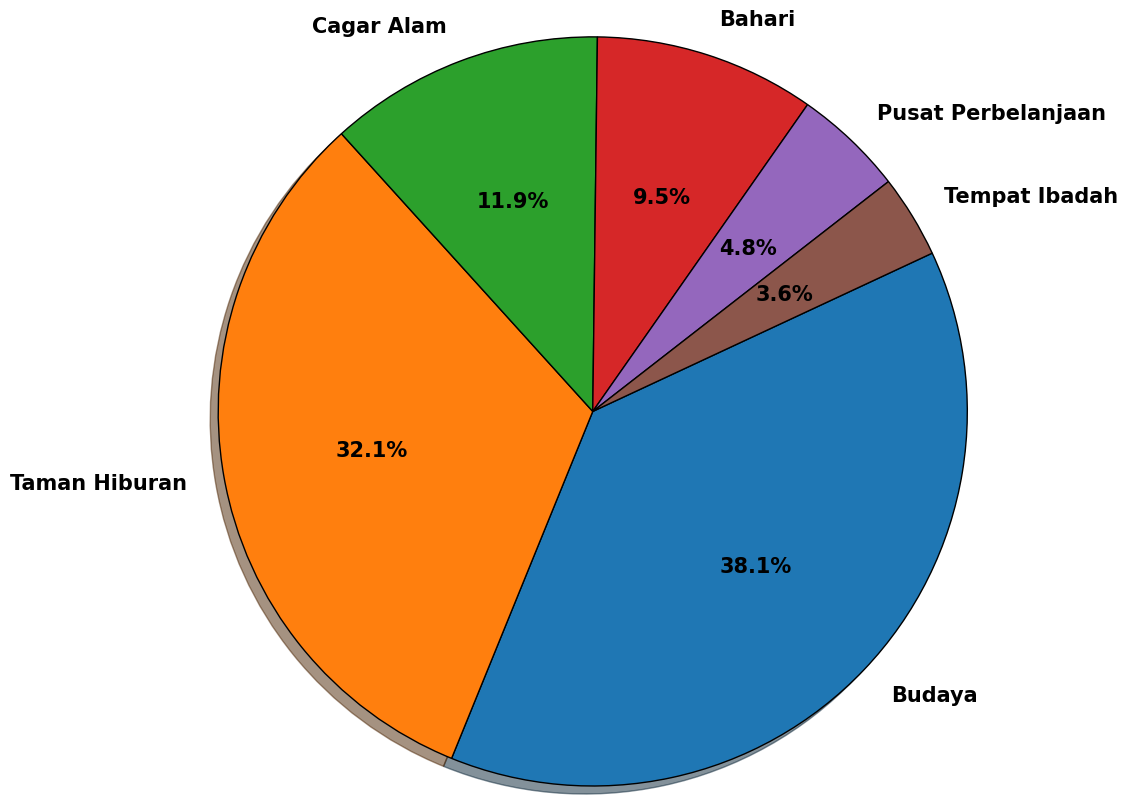

In [22]:
columns_category_type = destination['Category'].unique().tolist()
plt.rcParams["figure.figsize"] = (15,8)
plt.pie(destination['Category'].value_counts(), autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'}, counterclock=False, shadow=True, startangle=25,
        radius=1.3, labels=columns_category_type, textprops={'fontsize': 15, 'weight': 'bold'})
plt.tight_layout()

for label, count in destination['Category'].value_counts().iteritems():
    print("Jumlah Tempat Wisata dengan Kategori", label, ":", count)

***Dataset destination_rating***

In [23]:
destination_rating.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,User_Id,Place_Id,Place_Ratings
count,1920.00,1920.00,1920.00
mean,150.45,42.62,3.01
std,86.93,23.95,1.38
min,1.00,1.00,1.00
25%,74.00,22.75,2.00
50%,150.00,42.00,3.00
75%,224.25,63.00,4.00
max,300.00,84.00,5.00


Terdapat 1920 ulasan dari *user* dengan *rating* terendah yang diberikan *user* adalah 1.0 dan *rating* tertinggi sebesar 5.0.

***Dataset *user****

In [24]:
user.describe()

,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


Terdapat 300 pengguna atau user. Rata-rata usia dari seluruh pengguna adalah 28.7 tahun, dengan usia user termuda 18 tahun dan usia user tertua 40 tahun.

#***Multivariate Exploratory Data Analysis*** **(MEDA)**

Rerata Harga Tiket Masuk Berdasarkan Kategori Wisata

In [25]:
Kategori_Biaya = destination.groupby('Category').agg({'Price': 'mean'})
Kategori_Biaya = Kategori_Biaya.reset_index()
Kategori_Biaya = Kategori_Biaya.rename(columns={'Price': 'Mean Price'})
Kategori_Biaya = Kategori_Biaya.sort_values(by='Mean Price', ascending=False)
Kategori_Biaya['Mean Price'] = Kategori_Biaya['Mean Price'].round(2)
Kategori_Biaya.style.hide_index().format({'Mean Price': '{:.2f}'})

<ipython-input-25-8941c0671f8d>:6: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  Kategori_Biaya.style.hide_index().format({'Mean Price': '{:.2f}'})


Category,Mean Price
Bahari,181250.00
Taman Hiburan,75259.26
Cagar Alam,26000.00
Budaya,6406.25
Pusat Perbelanjaan,0.00
Tempat Ibadah,0.00


Top 10 Destinasi Wisata dengan Harga Tiket Masuk Termahal

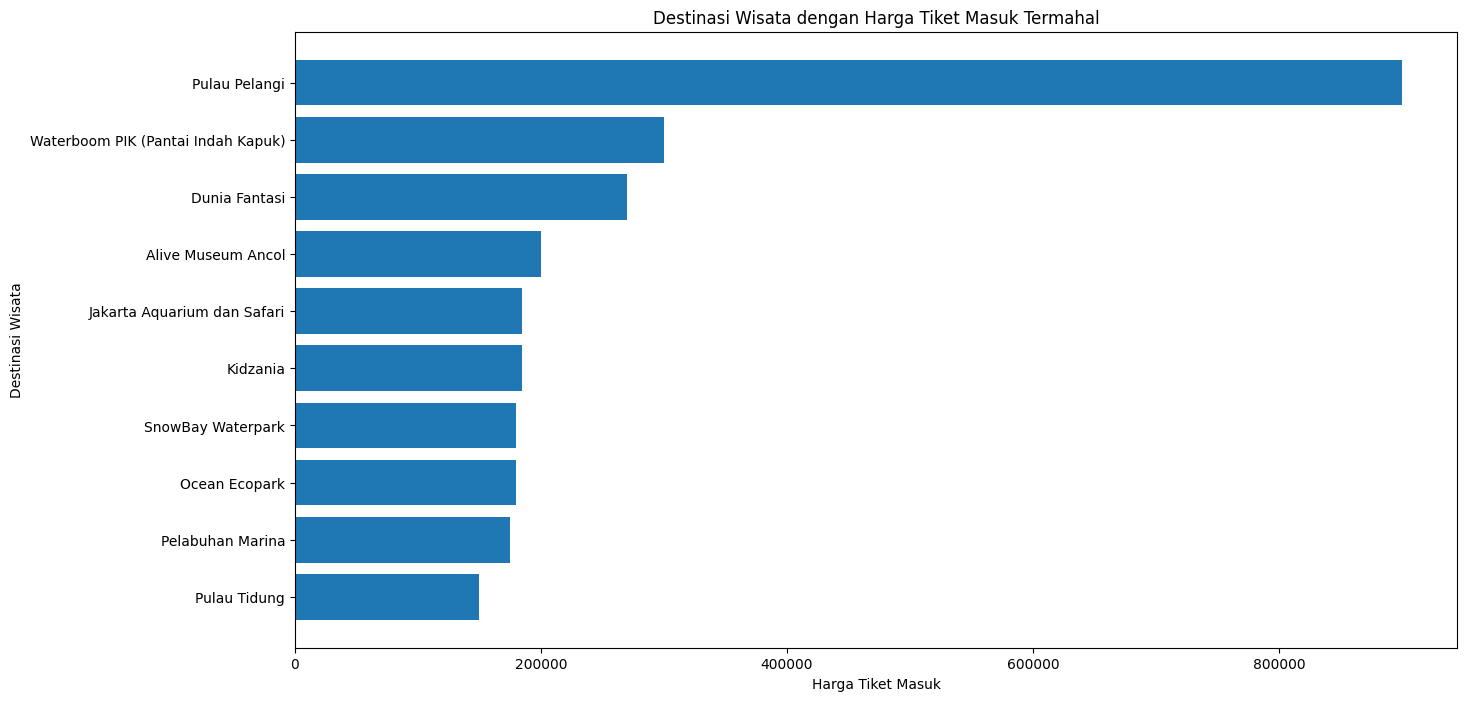

In [26]:
df = pd.DataFrame(destination)
df_terpilih = ['Place_Name', 'Category', 'Price']
df_terpilih = df[df_terpilih]
harga = df_terpilih.nlargest(10, 'Price')
harga = harga.sort_values(by='Price', ascending=True)
plt.barh(harga['Place_Name'], harga['Price'])
plt.xlabel('Harga Tiket Masuk')
plt.ylabel('Destinasi Wisata')
plt.title('Destinasi Wisata dengan Harga Tiket Masuk Termahal')
plt.show()

Top 10 Destinasi Wisata dengan Jumlah Ulasan (Rating) Terbanyak

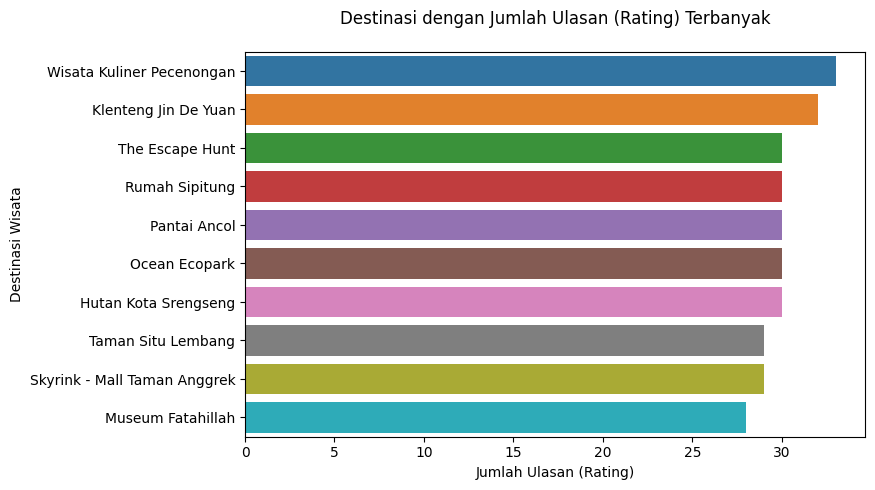

In [27]:
top_10 = destination_rating['Place_Id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10, destination[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')
plt.figure(figsize=(8,5))
sns.barplot(x='Place_Id_x', y='Place_Name', data=top_10)
plt.title('Destinasi dengan Jumlah Ulasan (Rating) Terbanyak', pad=20)
plt.xlabel('Jumlah Ulasan (Rating)')
plt.ylabel('Destinasi Wisata')
plt.show()

Jumlah User dari Tiap Kota Asal

User berasal dari 28 kota berbeda


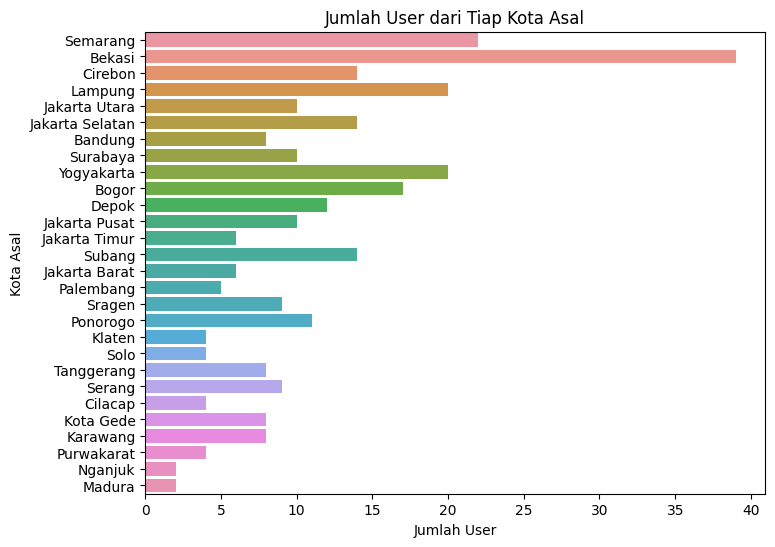

In [28]:
asalkota = user['Location'].apply(lambda x : x.split(',')[0])
plt.figure(figsize=(8,6))
sns.countplot(y=asalkota)
plt.xlabel('Jumlah User')
plt.ylabel('Kota Asal')
plt.title('Jumlah User dari Tiap Kota Asal')
print(f"User berasal dari {user['Location'].nunique()} kota berbeda")
plt.show()

Detail Jumlah User Tiap Kota Asal

In [29]:
for label, count in user['Location'].value_counts().iteritems():
    print("Jumlah User dari Kota", label, ":", count)

Jumlah User dari Kota Bekasi, Jawa Barat : 39
Jumlah User dari Kota Semarang, Jawa Tengah : 22
Jumlah User dari Kota Yogyakarta, DIY : 20
Jumlah User dari Kota Lampung, Sumatera Selatan : 20
Jumlah User dari Kota Bogor, Jawa Barat : 17
Jumlah User dari Kota Jakarta Selatan, DKI Jakarta : 14
Jumlah User dari Kota Subang, Jawa Barat : 14
Jumlah User dari Kota Cirebon, Jawa Barat : 14
Jumlah User dari Kota Depok, Jawa Barat : 12
Jumlah User dari Kota Ponorogo, Jawa Timur : 11
Jumlah User dari Kota Surabaya, Jawa Timur : 10
Jumlah User dari Kota Jakarta Utara, DKI Jakarta : 10
Jumlah User dari Kota Jakarta Pusat, DKI Jakarta : 10
Jumlah User dari Kota Sragen, Jawa Tengah : 9
Jumlah User dari Kota Serang, Banten : 9
Jumlah User dari Kota Bandung, Jawa Barat : 8
Jumlah User dari Kota Tanggerang, Banten : 8
Jumlah User dari Kota Karawang, Jawa Barat : 8
Jumlah User dari Kota Kota Gede, DIY : 8
Jumlah User dari Kota Jakarta Barat, DKI Jakarta : 6
Jumlah User dari Kota Jakarta Timur, DKI Jakart

<ipython-input-29-7a2cb6129962>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label, count in user['Location'].value_counts().iteritems():


#**Modelling**

***Content Based Filtering***

TF-IDF

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(destination['Category'])

tf.get_feature_names_out()

array(['alam', 'bahari', 'budaya', 'cagar', 'hiburan', 'ibadah',
       'perbelanjaan', 'pusat', 'taman', 'tempat'], dtype=object)

TF-IDF diimplementasikan pada fitur "Category" yang merupakan fitur kategori wisata

In [35]:
tfidf_matrix = tf.fit_transform(destination['Category'])
tfidf_matrix.shape

(84, 10)

Transformasi hasil TF-IDF menjadi sebuah matriks

In [37]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.70710678,
         0.        , 0.        , 0.        , 0.70710678, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.70710678,
         0.        , 0.        , 0.        , 0.70710678, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.70710678,
         0.        , 0.        , 0.        , 0.70710678, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.70710678,
         0.        , 0.        , 0.        , 0.70710678, 0.        ],
        [0.70710678, 0.        , 0.        , 0.70710678, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.    

Hasil matriks di tampilkan dalam bentuk dataframe

In [38]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=destination.Place_Name
).sample(10, axis=0)

,alam,bahari,budaya,cagar,hiburan,ibadah,perbelanjaan,pusat,taman,tempat
Place_Name,,,,,,,,,,
Museum Wayang,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
Museum Perangko,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
Taman Menteng,0.000000,0.0,0.0,0.000000,0.707107,0.0,0.0,0.0,0.707107,0.0
Wisata Alam Mangrove Angke,0.707107,0.0,0.0,0.707107,0.000000,0.0,0.0,0.0,0.000000,0.0
Pulau Tidung,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
Istana Negara Republik Indonesia,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
Pulau Pelangi,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
Setu Babakan,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
Taman Ayodya,0.000000,0.0,0.0,0.000000,0.707107,0.0,0.0,0.0,0.707107,0.0


Cosine Similarity

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Hasil Cosine Similarity ditampilkan dalam bentuk dataframe

In [40]:
cosine_sim_df = pd.DataFrame(
    cosine_sim, index=destination.Place_Name, columns=destination.Place_Name)
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(10, axis=0)

Shape: (84, 84)


Place_Name,Monumen Nasional,Kota Tua,Dunia Fantasi,Taman Mini Indonesia Indah (TMII),Atlantis Water Adventure,Taman Impian Jaya Ancol,Kebun Binatang Ragunan,Ocean Ecopark,Pelabuhan Marina,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi,Pasar Seni,Jembatan Kota Intan,Museum Fatahillah,Museum Bank Indonesia,Kidzania,Museum Taman Prasasti,Museum Wayang,Masjid Istiqlal,Gereja Katedral,Museum Nasional,Pasar Tanah Abang,Pecinan Glodok,Sea World,Wisata Agro Edukatif Istana Susu Cibugary,Wisata Kuliner Pecenongan,Taman Menteng,Wisata Alam Mangrove Angke,Setu Babakan,Taman Suropati,Pasar Taman Puring,Grand Indonesia Mall,Skyrink - Mall Taman Anggrek,Bumi Perkemahan Cibubur,Istana Negara Republik Indonesia,Museum Macan (Modern and Contemporary Art in Nusantara),Galeri Nasional Indonesia,Museum Bahari Jakarta,Museum Seni Rupa dan Kramik,The Escape Hunt,Monumen Selamat Datang,Jakarta Aquarium dan Safari,Pulau Semak Daun,Taman Situ Lembang,Taman Ismail Marzuki,Galeri Indonesia Kaya,Museum Joang 45,Jakarta Planetarium,Kampung Cina,Rumah Sipitung,Taman Agrowisata Cilangkap,Klenteng Jin De Yuan,Pantai Ancol,Taman Lapangan Banteng,Taman Ayodya,Museum Sumpah Pemuda,Museum Tekstil,Tugu Proklamasi,Taman Legenda Keong Emas,Museum Kebangkitan Nasional,Museum Sasmita Loka Ahmad Yani,Museum Basoeki Abdullah,Museum Layang-layang,Margasatwa Muara Angke,Pasar Petak Sembilan,Freedom Library,Perpustakaan Nasional,Cibubur Garden Diary (Cibugary),Waterboom PIK (Pantai Indah Kapuk),Museum Perangko,Museum Tengah Kebun,SnowBay Waterpark,Taman Cattleya,Taman Hutan Tebet,Hutan Kota Srengseng,Taman Spathodea,Plaza Indonesia,Mall Thamrin City,Museum Satria Mandala,Alive Museum Ancol,Kawasan Kuliner BSM
Place_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alive Museum Ancol,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
Museum Basoeki Abdullah,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Ocean Ecopark,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
Taman Impian Jaya Ancol,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
Museum Tekstil,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Sea World,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
Wisata Agro Edukatif Istana Susu Cibugary,0.0,0.0,1.0,1.0,1.0,1.0,0.0,

Implementasi Sistem Rekomendasi

In [41]:
def destination_recommendations(place_name, similarity_data=cosine_sim_df, items=destination[['Place_Name', 'Category']], k=10):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(place_name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

Pendefinisian Destinasi Wisata yang dipilih pengguna sehingga sistem dapat mengembalikan informasi rekomendasi berdasarkan destinasi wisata yang diberikan

In [44]:
place_name = 'Taman Impian Jaya Ancol'
destination[destination.Place_Name.eq(place_name)]

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
5,6,Taman Impian Jaya Ancol,Taman Impian Jaya Ancol merupakan sebuah objek...,Taman Hiburan,Jakarta,25000,4.5,"{'lat': -6.117333200000001, 'lng': 106.8579951}",-6.117333,106.857995


Tampan Impian Jaya Ancol termasuk destinasi wisata dengan kategori taman hiburan, sehingga sistem seharusnya dapat mengembalikan informasi rekomendasi destinasi wisata dengan kategori yang sama yaitu taman hiburan

Hasil 10 Top Rekomendasi

In [46]:
destination_recommendations(place_name)

,Place_Name,Category
0,Kidzania,Taman Hiburan
1,The Escape Hunt,Taman Hiburan
2,Wisata Agro Edukatif Istana Susu Cibugary,Taman Hiburan
3,Jakarta Aquarium dan Safari,Taman Hiburan
4,Taman Legenda Keong Emas,Taman Hiburan
5,Taman Menteng,Taman Hiburan
6,Taman Suropati,Taman Hiburan
7,Skyrink - Mall Taman Anggrek,Taman Hiburan
8,Sea World,Taman Hiburan
9,Taman Lapangan Banteng,Taman Hiburan


Dari hasil 10 Top Rekomendasi, dapat dilihat bahwa sistem sudah berhasil dalam merekomendasikan tempat destinasi wisata berdasarkan kategori destinasi wisata yang dipilih oleh pengguna. Dimana pengguna memilih "Taman Impian Jaya Ancol" dan sistem berhasil merekomendasikan 10 tempat yang berkategori sama dengan "Taman Impian Jaya Ancol" yaitu "Taman Hibuaran"